## PROBLEM 1

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

In [66]:
ed=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
ed3=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [4]:
ed.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
ed.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
ed.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [7]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
ed.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [9]:
ed.mean()

age                        54.182295
economic.cond.national      3.245902
economic.cond.household     3.140328
Blair                       3.334426
Hague                       2.746885
Europe                      6.728525
political.knowledge         1.542295
dtype: float64

In [10]:
ed.median()

age                        53.0
economic.cond.national      3.0
economic.cond.household     3.0
Blair                       4.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
dtype: float64

In [11]:
ed.std()

age                        15.711209
economic.cond.national      0.880969
economic.cond.household     0.929951
Blair                       1.174824
Hague                       1.230703
Europe                      3.297538
political.knowledge         1.083315
dtype: float64

In [12]:
ed.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [13]:
ed.var()

age                        246.842075
economic.cond.national       0.776107
economic.cond.household      0.864810
Blair                        1.380212
Hague                        1.514631
Europe                      10.873759
political.knowledge          1.173571
dtype: float64

In [14]:
ed.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


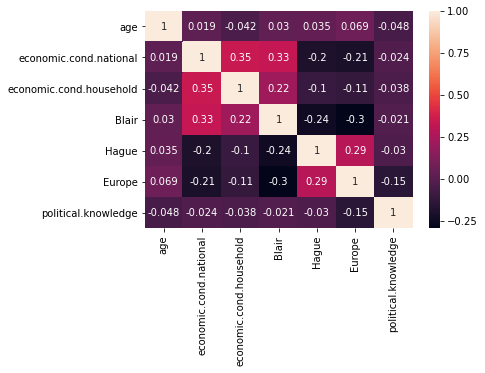

In [15]:
sns.heatmap(ed.corr(),annot=True)

In [16]:
ed.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [17]:
ed.vote.value_counts(normalize=True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [18]:
#Duplicate records
dups = ed.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
ed[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [19]:
ed.drop_duplicates(inplace=True)
ed.shape

(1517, 9)

In [20]:
for column in ed.columns:
    if ed[column].dtype == 'object':
        print(column.upper(),': ',ed[column].nunique())
        print(ed[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [21]:
#IQR before scaling
ed.quantile(q=0.75,axis=0) - ed.quantile(q=0.25,axis=0)

age                        26.0
economic.cond.national      1.0
economic.cond.household     1.0
Blair                       2.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
dtype: float64

# Univariate Analysis

(array([ 76., 193., 208., 224., 211., 177., 196., 154.,  61.,  17.]),
 array([24. , 30.9, 37.8, 44.7, 51.6, 58.5, 65.4, 72.3, 79.2, 86.1, 93. ]),
 <a list of 10 Patch objects>)

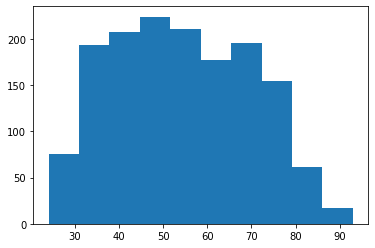

In [22]:
plt.hist(ed['age'])

(array([ 37.,   0., 256.,   0.,   0., 604.,   0., 538.,   0.,  82.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

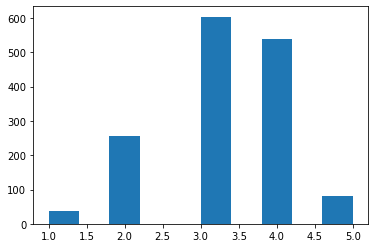

In [23]:
plt.hist(ed['economic.cond.national'])

(array([ 65.,   0., 280.,   0.,   0., 645.,   0., 435.,   0.,  92.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

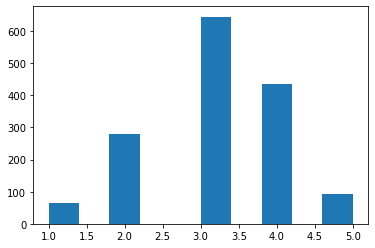

In [24]:
plt.hist(ed['economic.cond.household'])

(array([ 97.,   0., 434.,   0.,   0.,   1.,   0., 833.,   0., 152.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

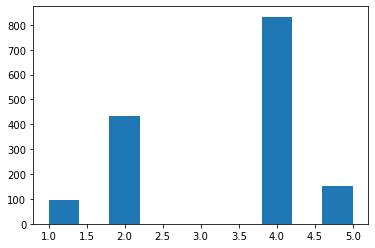

In [25]:
plt.hist(ed['Blair'])

(array([233.,   0., 617.,   0.,   0.,  37.,   0., 557.,   0.,  73.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

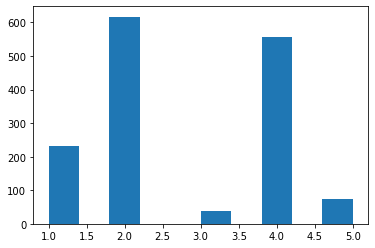

In [26]:
plt.hist(ed['Hague'])

(array([109.,  77., 128., 126., 123., 207.,  86., 111., 111., 439.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

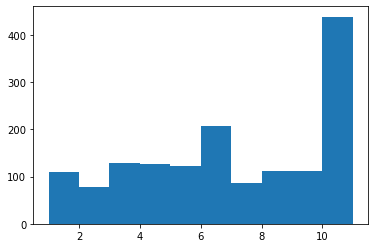

In [27]:
plt.hist(ed['Europe'])

(array([454.,   0.,   0.,  38.,   0.,   0., 776.,   0.,   0., 249.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

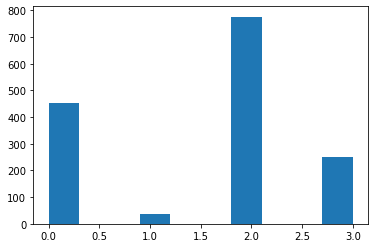

In [28]:
plt.hist(ed['political.knowledge'])

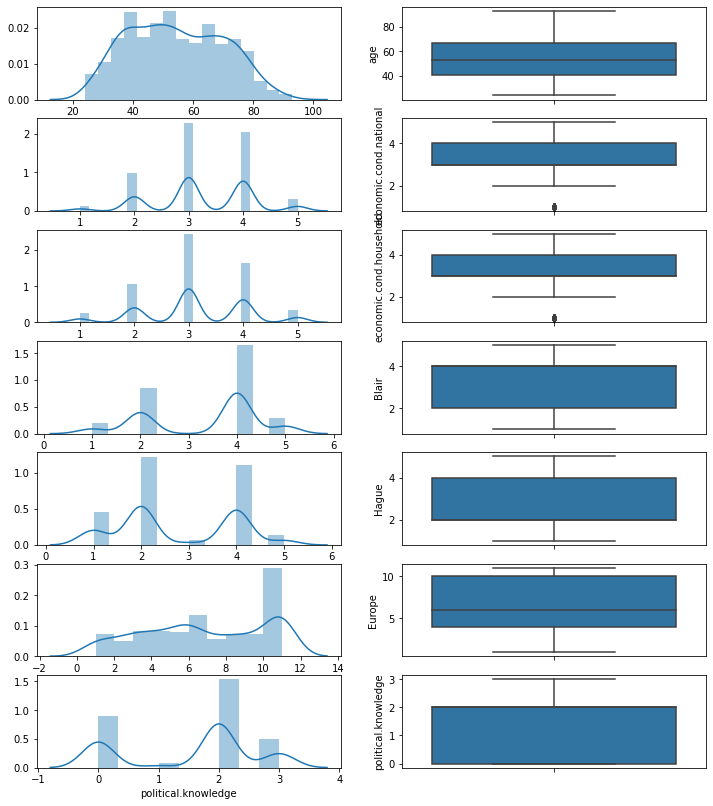

In [29]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(ed['age'] , ax=axes[0][0])
a = sns.boxplot(ed['age'] , orient = "v" , ax=axes[0][1])

a = sns.distplot(ed['economic.cond.national'] , ax=axes[1][0])
a = sns.boxplot(ed['economic.cond.national'] , orient = "v" , ax=axes[1][1])

a = sns.distplot(ed['economic.cond.household'] , ax=axes[2][0])
a = sns.boxplot(ed['economic.cond.household'] , orient = "v" , ax=axes[2][1])

a = sns.distplot(ed['Blair'] , ax=axes[3][0])
a = sns.boxplot(ed['Blair'] , orient = "v" , ax=axes[3][1])

a = sns.distplot(ed['Hague'] , ax=axes[4][0])
a = sns.boxplot(ed['Hague'] , orient = "v" , ax=axes[4][1])

a = sns.distplot(ed['Europe'] , ax=axes[5][0])
a = sns.boxplot(ed['Europe'] , orient = "v" , ax=axes[5][1])

a = sns.distplot(ed['political.knowledge'] , ax=axes[6][0])
a = sns.boxplot(ed['political.knowledge'] , orient = "v" , ax=axes[6][1])

plt.show()

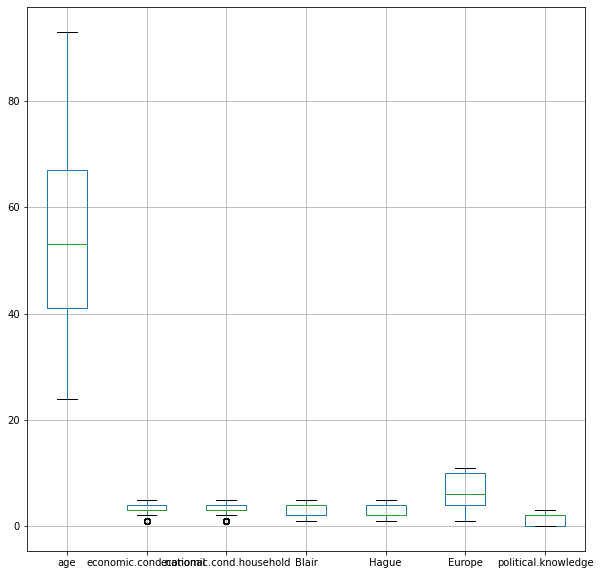

In [30]:
plt.figure(figsize=(10,10))
ed.boxplot()

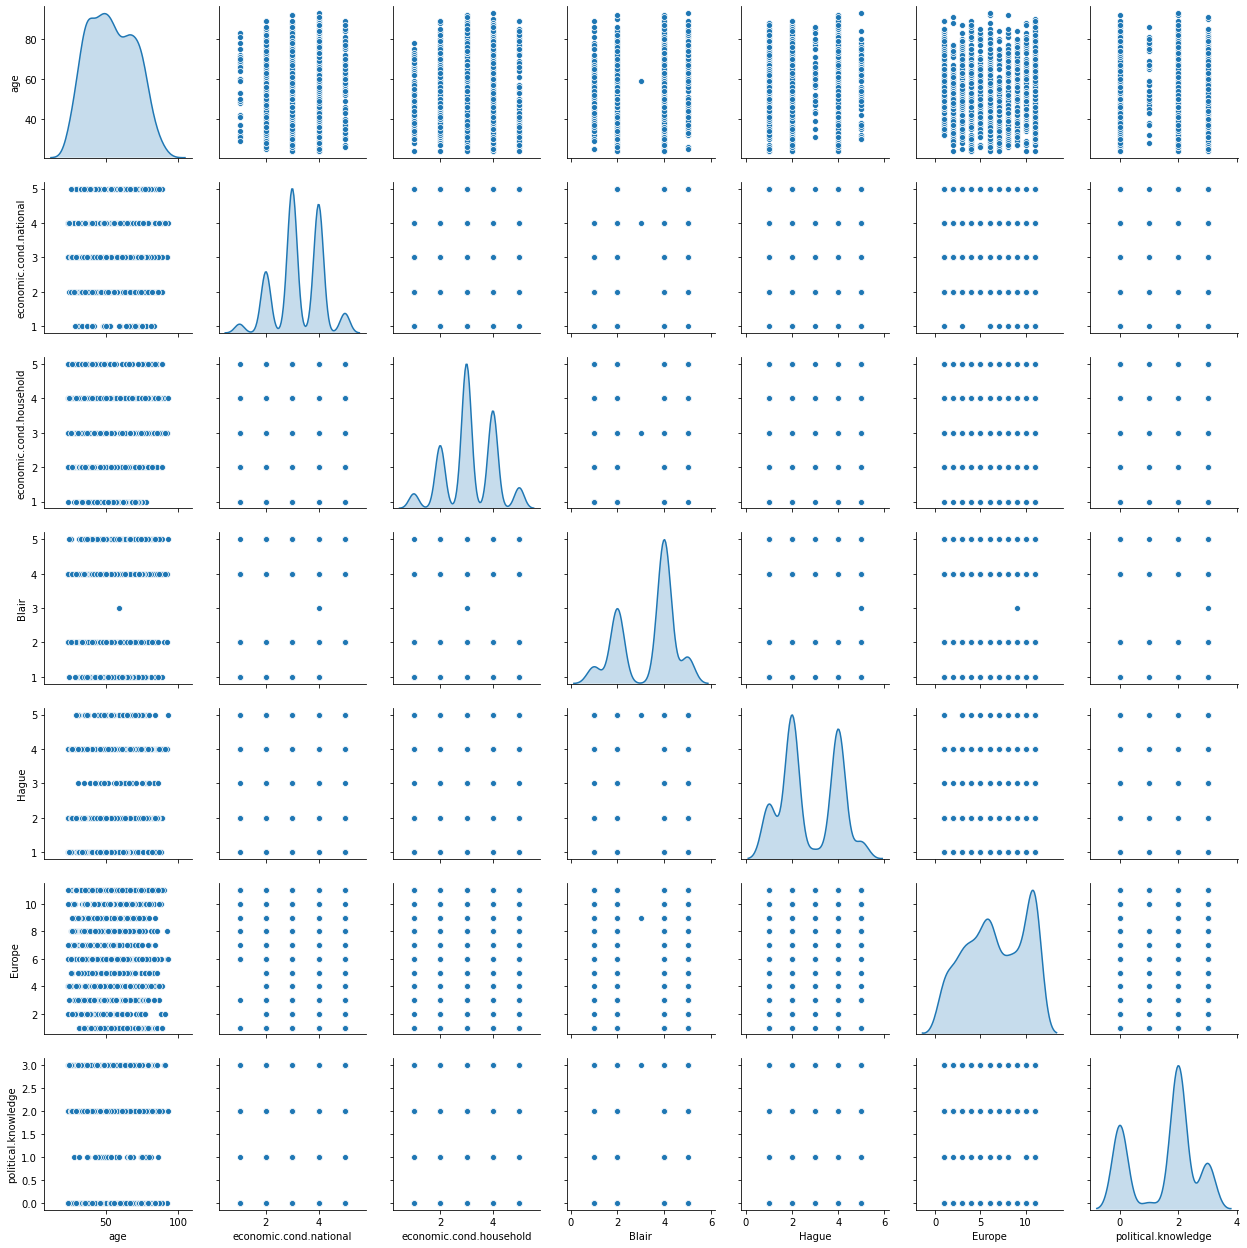

In [31]:
sns.pairplot(ed,diag_kind = 'kde')

In [32]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [33]:
lecn,uecn=remove_outlier(ed['economic.cond.national'])
ed['economic.cond.national']=np.where(ed['economic.cond.national']>uecn,uecn,ed['economic.cond.national'])
ed['economic.cond.national']=np.where(ed['economic.cond.national']<lecn,lecn,ed['economic.cond.national'])

lech,uech=remove_outlier(ed['economic.cond.household'])
ed['economic.cond.household']=np.where(ed['economic.cond.household']>uech,uech,ed['economic.cond.household'])
ed['economic.cond.household']=np.where(ed['economic.cond.household']<lech,lech,ed['economic.cond.household'])


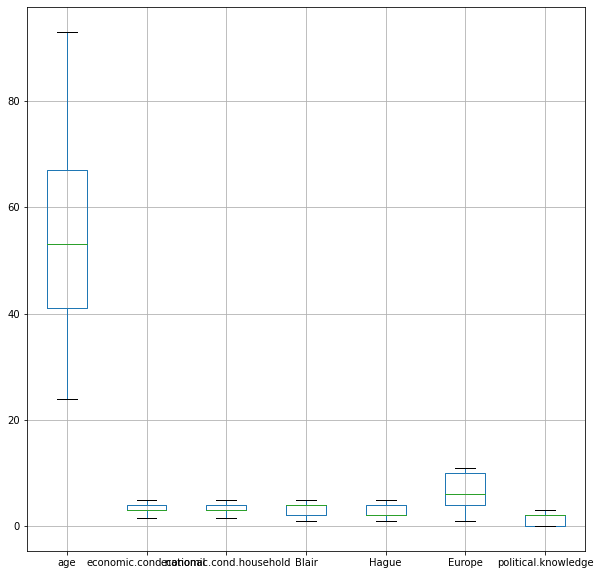

In [34]:
plt.figure(figsize=(10,10))
ed.boxplot()

In [35]:
#Converting all objects to categorical codes
for feature in ed.columns: 
    if ed[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ed[feature].unique()))
        print(pd.Categorical(ed[feature].unique()).codes)
        ed[feature] = pd.Categorical(ed[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [36]:
ed.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,0.696770,54.241266,3.257416,3.159196,3.335531,2.749506,6.740277,1.540541,0.467370
std,0.459805,15.701741,0.853647,0.886279,1.174772,1.232479,3.299043,1.084417,0.499099
min,0.000000,24.000000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000
50%,1.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,0.000000
75%,1.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000
max,1.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000


In [37]:
ed.corr()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,1.000000,-0.109274,0.304028,0.176807,0.426606,-0.468186,-0.384612,-0.111589,0.034464
age,-0.109274,1.000000,0.022283,-0.044403,0.032084,0.031144,0.064562,-0.046598,-0.017933
economic.cond.national,0.304028,0.022283,1.000000,0.344462,0.323603,-0.199175,-0.206605,-0.029273,0.054950
economic.cond.household,0.176807,-0.044403,0.344462,1.000000,0.216653,-0.099644,-0.112186,-0.040521,0.033001
Blair,0.426606,0.032084,0.323603,0.216653,1.000000,-0.243508,-0.295944,-0.021299,0.067624
Hague,-0.468186,0.031144,-0.199175,-0.099644,-0.243508,1.000000,0.285738,-0.029906,-0.028309
Europe,-0.384612,0.064562,-0.206605,-0.112186,-0.295944,0.285738,1.000000,-0.151197,-0.076059
political.knowledge,-0.111589,-0.046598,-0.029273,-0.040521,-0.021299,-0.029906,-0.151197,1.000000,0.156923
gender,0.034464,-0.017933,0.054950,0.033001,0.067624,-0.028309,-0.076059,0.156923,1.000000


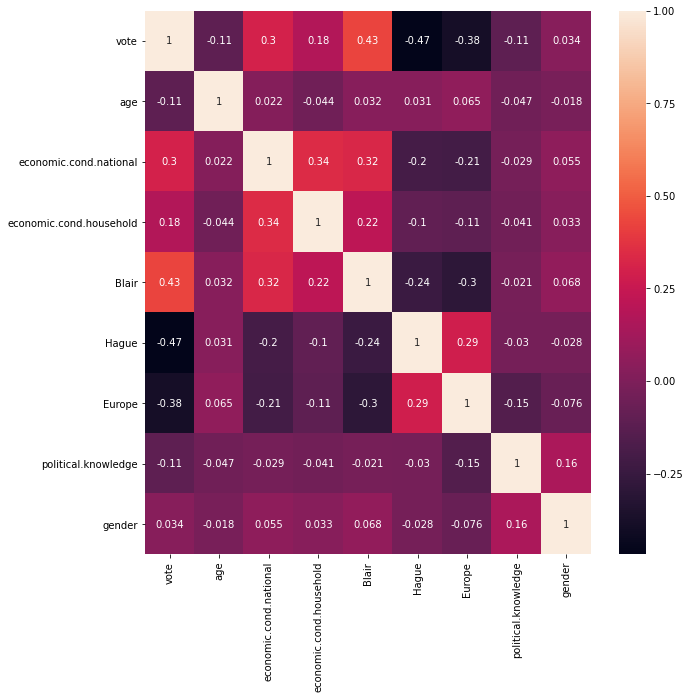

In [38]:
plt.subplots(figsize=(10,10))
sns.heatmap(ed.corr(),annot=True)

In [39]:
ed['age'] = ed[['age']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [40]:
ed.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,0.275362,3.0,3.0,4,1,2,2,0
1,1,0.173913,4.0,4.0,4,4,5,2,1
2,1,0.159420,4.0,4.0,5,2,3,2,1
3,1,0.000000,4.0,2.0,2,1,4,0,0
4,1,0.246377,2.0,2.0,1,1,6,2,1


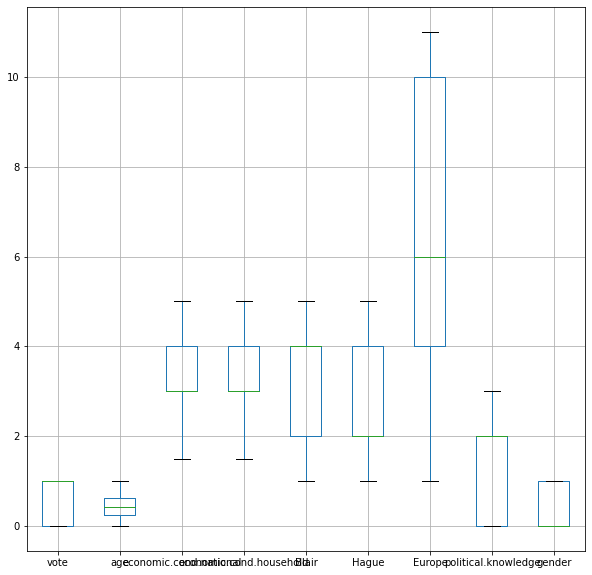

In [41]:
plt.subplots(figsize=(10,10))
ed.boxplot(figsize=(20,20))

# Logistic Regression

In [44]:
# Copy all the predictor variables into X dataframe
X = ed.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = ed['vote']

In [45]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=20)

In [44]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',verbose=True,n_jobs=2,random_state=10)
model.fit(X_train, y_train)
model
# Fit the model on original data i.e. before upsampling
# model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(n_jobs=2, random_state=10, solver='newton-cg', verbose=True)

In [45]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [46]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.352946,0.647054
1,0.490225,0.509775
2,0.035001,0.964999
3,0.132398,0.867602
4,0.054292,0.945708


In [47]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8378887841658812

AUC: 0.889


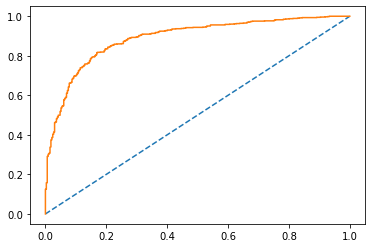

In [48]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.889


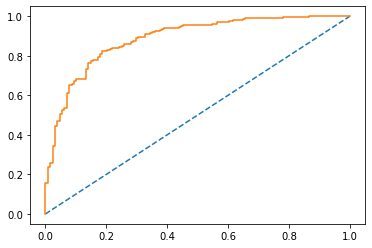

In [49]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [50]:
confusion_matrix(y_train, ytrain_predict)

array([[227, 105],
       [ 67, 662]], dtype=int64)

In [51]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.68      0.73       332
           1       0.86      0.91      0.89       729

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.83      0.84      0.84      1061



In [52]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 86,  42],
       [ 34, 294]], dtype=int64)

In [53]:
#Test Data Accuracy
test_acc=model.score(X_test,y_test)
test_acc

0.8333333333333334

In [54]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       128
           1       0.88      0.90      0.89       328

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



In [55]:
# invoke the LogisticRegression function and find the bestfit model on training data

regression_model = LogisticRegression(solver='newton-cg',verbose=True,n_jobs=2,random_state=10)
regression_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(n_jobs=2, random_state=10, solver='newton-cg', verbose=True)

In [56]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is -0.8632949101209509
The coefficient for economic.cond.national is 0.5364048097960228
The coefficient for economic.cond.household is 0.010020955565241076
The coefficient for Blair is 0.6172378126443433
The coefficient for Hague is -0.8390475842542929
The coefficient for Europe is -0.20088963942720928
The coefficient for political.knowledge is -0.4239522230435071
The coefficient for gender is 0.12000634578355901


# Model Tuning Logistic Regression

In [73]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['newton-cg','lbfgs'],
    'max_iter': [12000,10000,8000],
    'penalty': ['none'],
    'verbose': [True],
    'n_jobs': [1,2,3],
    'random_state': [0,5,10,20]
 }
# solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=10
lgr= LogisticRegression(random_state=0)

grid_search = GridSearchCV(estimator = lgr, param_grid = param_grid, cv = 5)

In [74]:
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concu

[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concu

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'max_iter': [12000, 10000, 8000], 'n_jobs': [1, 2, 3],
                         'penalty': ['none'], 'random_state': [0, 5, 10, 20],
                         'solver': ['newton-cg', 'lbfgs'], 'verbose': [True]})

In [75]:
grid_search.best_params_

{'max_iter': 12000,
 'n_jobs': 1,
 'penalty': 'none',
 'random_state': 0,
 'solver': 'newton-cg',
 'verbose': True}

In [76]:
best_grid = grid_search.best_estimator_

In [77]:
best_grid

LogisticRegression(max_iter=12000, n_jobs=1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

In [78]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [79]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.345494,0.654506
1,0.482317,0.517683
2,0.035843,0.964157
3,0.131962,0.868038
4,0.052077,0.947923


In [80]:
confusion_matrix(y_train,ytrain_predict)

array([[225, 107],
       [ 68, 661]], dtype=int64)

In [81]:
#Accuracy for train dataset RF
rf_train_acc=best_grid.score(X_train,y_train) 
rf_train_acc

0.8350612629594723

In [82]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       332
           1       0.86      0.91      0.88       729

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



AUC: 0.889


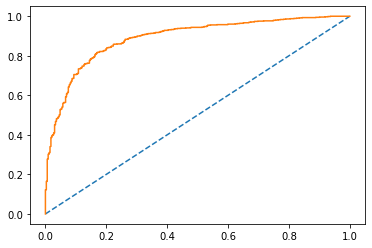

In [83]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.889


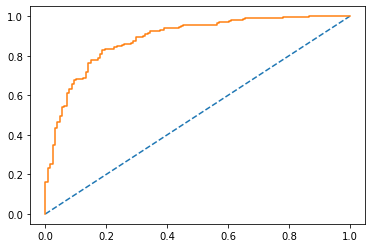

In [84]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [85]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 87,  41],
       [ 33, 295]], dtype=int64)

In [86]:
#Test Data Accuracy
test_acc=best_grid.score(X_test,y_test)
test_acc

0.8377192982456141

In [87]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       128
           1       0.88      0.90      0.89       328

    accuracy                           0.84       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



In [88]:
# invoke the LogisticRegression function and find the bestfit model on training data

regression_model = LogisticRegression(solver='newton-cg',max_iter=12000,penalty='none',verbose=True,n_jobs=1,random_state=0)
regression_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=12000, n_jobs=1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

In [89]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is -0.997388729808764
The coefficient for economic.cond.national is 0.5466368056219292
The coefficient for economic.cond.household is 0.0028714603862289145
The coefficient for Blair is 0.6234309372236437
The coefficient for Hague is -0.8451743221672664
The coefficient for Europe is -0.20026489416340204
The coefficient for political.knowledge is -0.42932994466993146
The coefficient for gender is 0.12228534798163658


# LDA

In [57]:
# Copy all the predictor variables into X dataframe
A = ed.drop('vote', axis=1)
A = np.asmatrix(A)
# #Scale X
# X = scale(X)

# Copy target into the y dataframe. 
B = np.asarray(ed[['vote']])

In [58]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.30 , random_state=20)

In [59]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model1=clf.fit(A_train,B_train)
model1

C:\Users\RG\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [60]:
Btrain_predict = model1.predict(A_train)
Btest_predict = model1.predict(A_test)

In [61]:
# Accuracy - Training Data
clf.score(A_train, B_train)

0.8331762488218661

AUC: 0.889


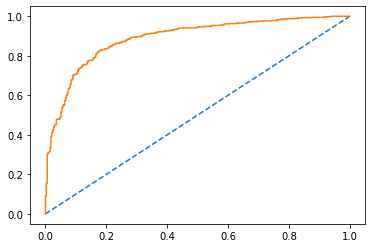

In [62]:
# predict probabilities
probs = model1.predict_proba(A_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(B_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(B_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [63]:
# Accuracy - Test Data
model1.score(A_test, B_test)

0.8355263157894737

AUC: 0.889


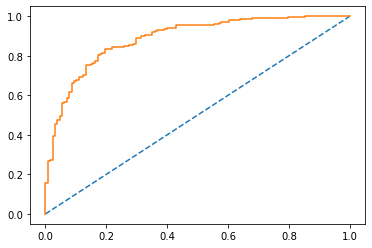

In [64]:
# predict probabilities
probs = model1.predict_proba(A_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(B_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(B_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [65]:
confusion_matrix(B_train, Btrain_predict)

array([[230, 102],
       [ 75, 654]], dtype=int64)

In [66]:
print(classification_report(B_train, Btrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       332
           1       0.87      0.90      0.88       729

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [67]:
cnf_matrix=confusion_matrix(B_test, Btest_predict)
cnf_matrix

array([[ 89,  39],
       [ 36, 292]], dtype=int64)

In [68]:
#Test Data Accuracy
test_acc=model1.score(A_test,B_test)
test_acc

0.8355263157894737

In [192]:
print(classification_report(B_test, Btest_predict))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       128
           1       0.88      0.89      0.89       328

    accuracy                           0.84       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.83      0.84      0.83       456



In [69]:
# Predict it
ed1=ed.copy()
pred_class = model1.predict(A)
ed1['Prediction'] = pred_class 
ed1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,Prediction
0,1,0.275362,3.0,3.0,4,1,2,2,0,1
1,1,0.173913,4.0,4.0,4,4,5,2,1,1
2,1,0.159420,4.0,4.0,5,2,3,2,1,1
3,1,0.000000,4.0,2.0,2,1,4,0,0,1
4,1,0.246377,2.0,2.0,1,1,6,2,1,1


In [70]:
#generate Confusion Matrix
confusion_matrix(B, pred_class)

array([[319, 141],
       [111, 946]], dtype=int64)

In [71]:
model1.score(A,B)

0.8338826631509558

In [72]:
from sklearn.metrics import classification_report
print(classification_report(B, pred_class))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72       460
           1       0.87      0.89      0.88      1057

    accuracy                           0.83      1517
   macro avg       0.81      0.79      0.80      1517
weighted avg       0.83      0.83      0.83      1517



# Model Tuning LDA

In [90]:
#Grid Search for finding out the optimal values for the hyper parameters

param_grid = {
    'solver': ['svd','lsqr','eigen'],
    'tol': [0.0001,0.001],
    'shrinkage': [None],
     }
# solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=10
lda= LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 5)

In [91]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [None],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001]})

In [92]:
grid_search.best_params_

{'shrinkage': None, 'solver': 'lsqr', 'tol': 0.0001}

In [93]:
best_grid = grid_search.best_estimator_
best_grid

LinearDiscriminantAnalysis(solver='lsqr')

In [94]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [95]:
confusion_matrix(y_train,ytrain_predict)

array([[231, 101],
       [ 75, 654]], dtype=int64)

In [96]:
#Accuracy for train dataset RF
rf_train_acc=best_grid.score(X_train,y_train) 
rf_train_acc

0.8341187558906692

In [97]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       332
           1       0.87      0.90      0.88       729

    accuracy                           0.83      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



AUC: 0.889


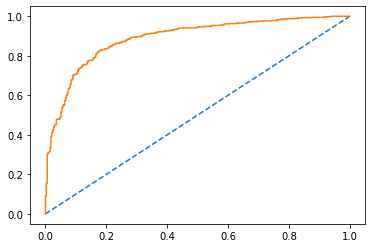

In [98]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.889


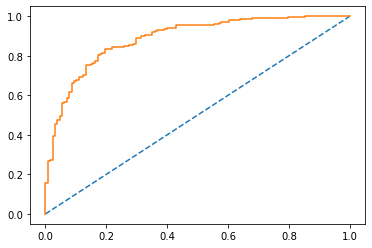

In [99]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [100]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 89,  39],
       [ 36, 292]], dtype=int64)

In [101]:
#Test Data Accuracy
test_acc=best_grid.score(X_test,y_test)
test_acc

0.8355263157894737

In [102]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       128
           1       0.88      0.89      0.89       328

    accuracy                           0.84       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.83      0.84      0.83       456



In [103]:
# Predict it
ed2=ed.copy()
pred_class = best_grid.predict(X)
ed2['Prediction'] = pred_class 
ed2.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,Prediction
0,1,0.275362,3.0,3.0,4,1,2,2,0,1
1,1,0.173913,4.0,4.0,4,4,5,2,1,1
2,1,0.159420,4.0,4.0,5,2,3,2,1,1
3,1,0.000000,4.0,2.0,2,1,4,0,0,1
4,1,0.246377,2.0,2.0,1,1,6,2,1,1


In [104]:
#generate Confusion Matrix
confusion_matrix(y, pred_class)

array([[320, 140],
       [111, 946]], dtype=int64)

In [105]:
best_grid.score(X,y)

0.8345418589321029

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y, pred_class))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       460
           1       0.87      0.89      0.88      1057

    accuracy                           0.83      1517
   macro avg       0.81      0.80      0.80      1517
weighted avg       0.83      0.83      0.83      1517



# KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=2)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [108]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.883129123468426
[[332   0]
 [124 605]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       332
           1       1.00      0.83      0.91       729

    accuracy                           0.88      1061
   macro avg       0.86      0.91      0.87      1061
weighted avg       0.91      0.88      0.89      1061



In [109]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7587719298245614
[[ 97  31]
 [ 79 249]]
              precision    recall  f1-score   support

           0       0.55      0.76      0.64       128
           1       0.89      0.76      0.82       328

    accuracy                           0.76       456
   macro avg       0.72      0.76      0.73       456
weighted avg       0.79      0.76      0.77       456



AUC: 0.966


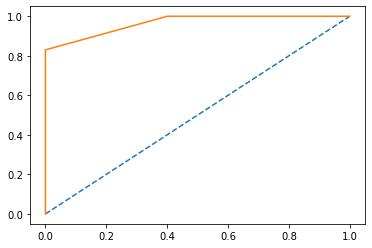

In [110]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.966


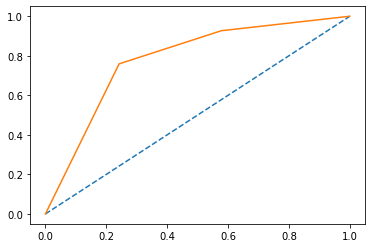

In [111]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Model Tuning KNN

In [112]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [2,3,5,7],
#     'weights ': ['uniform','distance'],
    'leaf_size': [1,10,30],
    'n_jobs': [2,3],
    'p': [1,2]
}
# solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=10
knn= KNeighborsClassifier()

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5)

In [113]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 10, 30], 'n_jobs': [2, 3],
                         'n_neighbors': [2, 3, 5, 7], 'p': [1, 2]})

In [114]:
grid_search.best_params_

{'leaf_size': 1, 'n_jobs': 2, 'n_neighbors': 7, 'p': 2}

In [115]:
best_grid = grid_search.best_estimator_
best_grid

KNeighborsClassifier(leaf_size=1, n_jobs=2, n_neighbors=7)

In [116]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [117]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8557964184731386
[[242  90]
 [ 63 666]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       729

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.85      0.86      0.85      1061



AUC: 0.926


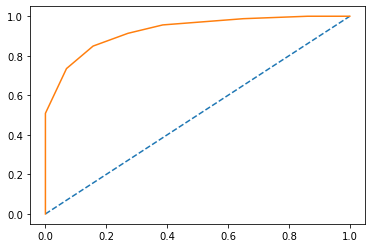

In [118]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.926


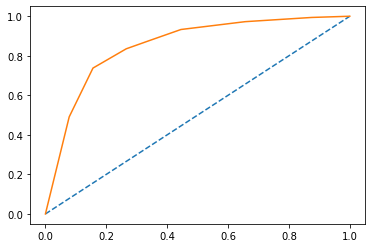

In [119]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [120]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7587719298245614
[[ 97  31]
 [ 79 249]]
              precision    recall  f1-score   support

           0       0.55      0.76      0.64       128
           1       0.89      0.76      0.82       328

    accuracy                           0.76       456
   macro avg       0.72      0.76      0.73       456
weighted avg       0.79      0.76      0.77       456



# Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [122]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [123]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8294062205466541
[[238  94]
 [ 87 642]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       332
           1       0.87      0.88      0.88       729

    accuracy                           0.83      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [124]:
y_test.value_counts()

1    328
0    128
Name: vote, dtype: int64

In [125]:
## Performance Matrix on test data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8294062205466541
[[238  94]
 [ 87 642]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       332
           1       0.87      0.88      0.88       729

    accuracy                           0.83      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [126]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8399122807017544
[[ 94  34]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       128
           1       0.89      0.88      0.89       328

    accuracy                           0.84       456
   macro avg       0.80      0.81      0.80       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.885


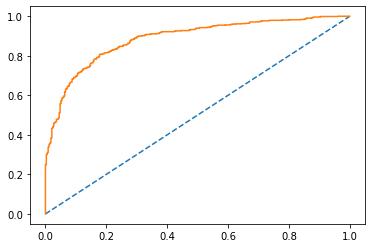

In [127]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.885


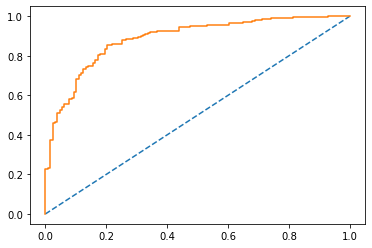

In [128]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Model Tuning Naive Bayes

In [129]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'var_smoothing': [1e-1,1e-8,1e-5]
 }
# solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=10
nb= GaussianNB()

grid_search = GridSearchCV(estimator = nb, param_grid = param_grid, cv = 3)

In [130]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 1e-08, 1e-05]})

In [131]:
grid_search.best_params_

{'var_smoothing': 1e-08}

In [132]:
best_grid = grid_search.best_estimator_
best_grid

GaussianNB(var_smoothing=1e-08)

In [133]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [134]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8294062205466541
[[238  94]
 [ 87 642]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       332
           1       0.87      0.88      0.88       729

    accuracy                           0.83      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [135]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8399122807017544
[[ 94  34]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       128
           1       0.89      0.88      0.89       328

    accuracy                           0.84       456
   macro avg       0.80      0.81      0.80       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.885


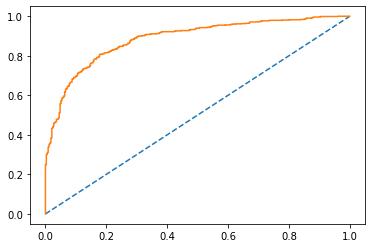

In [136]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.885


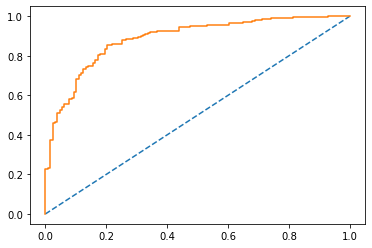

In [137]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# SVM

In [33]:
from sklearn import svm

SVM_model= svm.SVC(probability=True,random_state=1)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [139]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8294062205466541
[[216 116]
 [ 65 664]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       332
           1       0.85      0.91      0.88       729

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [140]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[ 82  46]
 [ 32 296]]
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       128
           1       0.87      0.90      0.88       328

    accuracy                           0.83       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.82      0.83      0.83       456



AUC: 0.898


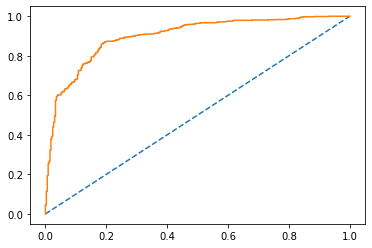

In [141]:
# predict probabilities
probs = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.898


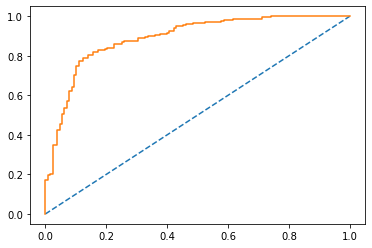

In [142]:
# predict probabilities
probs = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Model Tuning for SVM

# SVM

In [143]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'probability': [True],
    'tol': [0.0001,0.001],
    'kernel': ['linear','poly','sigmoid','rbf'],
    'gamma': ['scale', 'auto'],
    'random_state': [0,1,5,10,20]
 }
# solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=10
sv= svm.SVC()

grid_search = GridSearchCV(estimator = sv, param_grid = param_grid, cv = 5)

In [144]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
                         'probability': [True],
                         'random_state': [0, 1, 5, 10, 20],
                         'tol': [0.0001, 0.001]})

In [145]:
grid_search.best_params_

{'gamma': 'auto',
 'kernel': 'poly',
 'probability': True,
 'random_state': 0,
 'tol': 0.0001}

In [146]:
best_grid = grid_search.best_estimator_
best_grid

SVC(gamma='auto', kernel='poly', probability=True, random_state=0, tol=0.0001)

In [147]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [148]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8661639962299718
[[246  86]
 [ 56 673]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       332
           1       0.89      0.92      0.90       729

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.86      0.87      0.86      1061



In [149]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[ 87  41]
 [ 35 293]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       128
           1       0.88      0.89      0.89       328

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.917


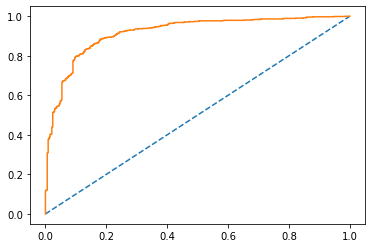

In [150]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.917


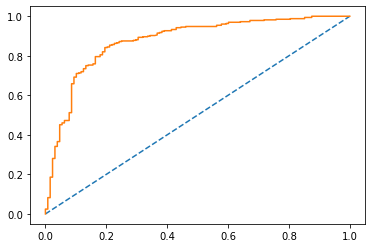

In [151]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Random Forest (Bagging)

In [192]:
##Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [193]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9670122525918945
[[307  25]
 [ 10 719]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       332
           1       0.97      0.99      0.98       729

    accuracy                           0.97      1061
   macro avg       0.97      0.96      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [194]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8442982456140351
[[ 87  41]
 [ 30 298]]
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       128
           1       0.88      0.91      0.89       328

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.997


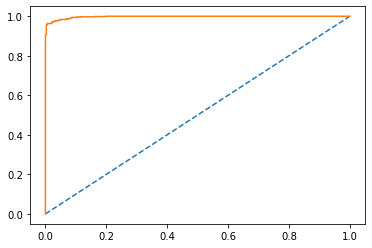

In [195]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.997


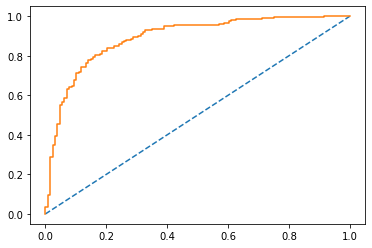

In [196]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Model Tuning Bagging classifier

In [197]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'base_estimator__n_estimators': [200,300,350],
    'base_estimator__max_features': [4,5,6,7],
    'base_estimator__random_state': [0,5]
 }
# solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=10
# ada= AdaBoostClassifier()
rf = RandomForestClassifier()
bgm=BaggingClassifier(base_estimator=rf)
grid_search = GridSearchCV(estimator = bgm, param_grid = param_grid, cv = 5)

In [198]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier()),
             param_grid={'base_estimator__max_features': [4, 5, 6, 7],
                         'base_estimator__n_estimators': [200, 300, 350],
                         'base_estimator__random_state': [0, 5]})

In [199]:
grid_search.best_params_

{'base_estimator__max_features': 4,
 'base_estimator__n_estimators': 350,
 'base_estimator__random_state': 5}

In [200]:
best_grid = grid_search.best_estimator_
best_grid

BaggingClassifier(base_estimator=RandomForestClassifier(max_features=4,
                                                        n_estimators=350,
                                                        random_state=5))

In [201]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [202]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9736098020735156
[[313  19]
 [  9 720]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       332
           1       0.97      0.99      0.98       729

    accuracy                           0.97      1061
   macro avg       0.97      0.97      0.97      1061
weighted avg       0.97      0.97      0.97      1061



In [203]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8421052631578947
[[ 89  39]
 [ 33 295]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       128
           1       0.88      0.90      0.89       328

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.996


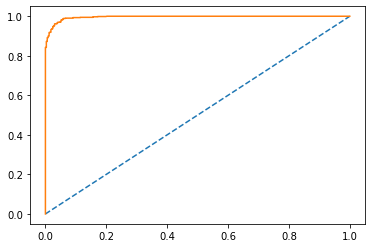

In [204]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.996


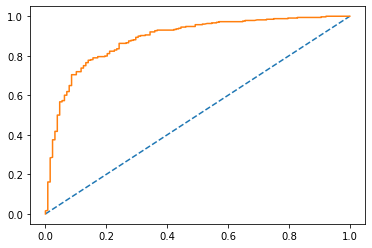

In [205]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Boosting

# Adaboost

In [46]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [153]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8529688972667295
[[243  89]
 [ 67 662]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       332
           1       0.88      0.91      0.89       729

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.85      0.85      0.85      1061



In [154]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[ 86  42]
 [ 35 293]]
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       128
           1       0.87      0.89      0.88       328

    accuracy                           0.83       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.916


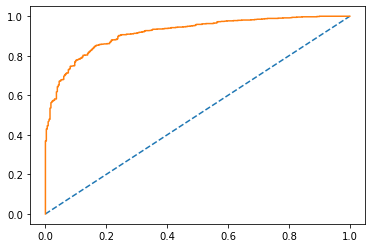

In [155]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.916


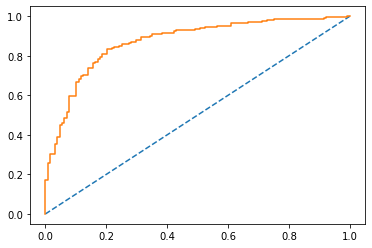

In [156]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Model Tuning Adaboost

In [157]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,150,200,500],
    'learning_rate': [0.01,0.1,1.0],
    'algorithm': ['SAMME.R','SAMME'],
    'random_state': [0,5,10,20]
 }
# solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=10
ada= AdaBoostClassifier()

grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 5)

In [158]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [100, 150, 200, 500],
                         'random_state': [0, 5, 10, 20]})

In [159]:
grid_search.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.1,
 'n_estimators': 200,
 'random_state': 0}

In [160]:
best_grid = grid_search.best_estimator_
best_grid

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=0)

In [161]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [162]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8378887841658812
[[225 107]
 [ 65 664]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.72       332
           1       0.86      0.91      0.89       729

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [163]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[ 85  43]
 [ 32 296]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       128
           1       0.87      0.90      0.89       328

    accuracy                           0.84       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.84      0.83       456



AUC: 0.906


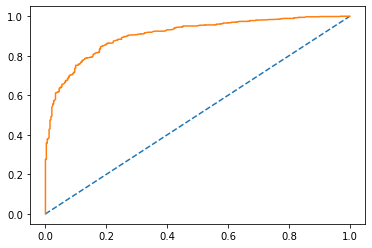

In [164]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.906


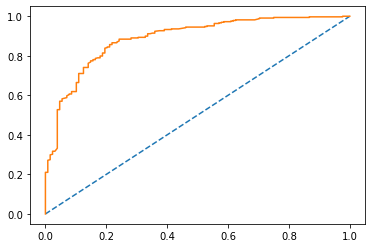

In [165]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# XG Boosting

In [175]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [176]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.879359095193214
[[266  66]
 [ 62 667]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       332
           1       0.91      0.91      0.91       729

    accuracy                           0.88      1061
   macro avg       0.86      0.86      0.86      1061
weighted avg       0.88      0.88      0.88      1061



In [177]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[ 90  38]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       128
           1       0.88      0.87      0.87       328

    accuracy                           0.82       456
   macro avg       0.78      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.942


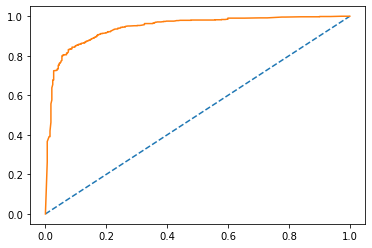

In [178]:
# predict probabilities
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.942


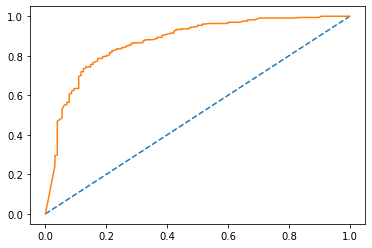

In [179]:
# predict probabilities
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Model Tuning XGBoost

In [182]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [4,5,6,7],
'learning_rate': [0.01,0.1,1.0],
#     'algorithm': ['SAMME.R','SAMME'],
    'random_state': [0,5,10,20]
 }

xgb1= xgb.XGBClassifier()

grid_search = GridSearchCV(estimator = xgb1, param_grid = param_grid, cv = 5)

In [183]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [184]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'random_state': 0}

In [185]:
best_grid = grid_search.best_estimator_
best_grid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [186]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [187]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8916116870876531
[[271  61]
 [ 54 675]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       332
           1       0.92      0.93      0.92       729

    accuracy                           0.89      1061
   macro avg       0.88      0.87      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [188]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8508771929824561
[[ 91  37]
 [ 31 297]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       128
           1       0.89      0.91      0.90       328

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.85      0.85      0.85       456



AUC: 0.959


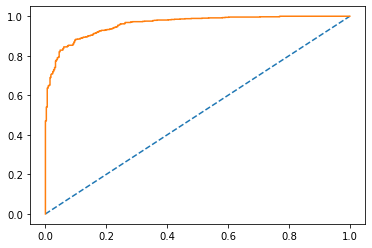

In [189]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.959


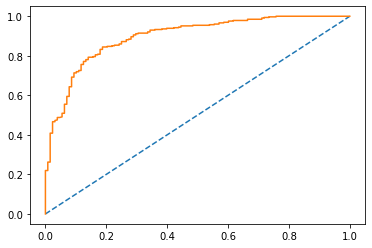

In [190]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# AdaBoost with SMOTE

In [67]:
swap = {"vote" : {"Conservative": 1, "Labour": 0}, 
        "gender" : {"male" : 1, "female" : 0}}

In [68]:
ed3.replace(swap, inplace = True)

In [70]:
ed3.drop(['Unnamed: 0'],axis=1,inplace=True)

In [71]:
lecn,uecn=remove_outlier(ed3['economic.cond.national'])
ed3['economic.cond.national']=np.where(ed3['economic.cond.national']>uecn,uecn,ed3['economic.cond.national'])
ed3['economic.cond.national']=np.where(ed3['economic.cond.national']<lecn,lecn,ed3['economic.cond.national'])

lech,uech=remove_outlier(ed3['economic.cond.household'])
ed3['economic.cond.household']=np.where(ed3['economic.cond.household']>uech,uech,ed3['economic.cond.household'])
ed3['economic.cond.household']=np.where(ed3['economic.cond.household']<lech,lech,ed3['economic.cond.household'])


In [72]:
ed3['age'] = ed3[['age']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [73]:
# Copy all the predictor variables into X dataframe
X = ed3.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = ed3['vote']

In [74]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=20)

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [77]:
## Let's check the shape after SMOTE
X_train_res.shape

(1446, 8)

In [78]:
# SVM_model= svm.SVC(gamma='auto',kernel='poly', probability=True, random_state=0, tol=0.0001)
# SVM_model.fit(X_train_res, y_train_res)
# # SVM_model= svm.SVC(probability=True,random_state=1)
# # SVM_model.fit(X_train_res, y_train_res)

In [79]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train_res, y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [80]:
## Performance Matrix on train data set
y_train_predict_res = ADB_model.predict(X_train_res)
model_score = ADB_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict_res))
print(metrics.classification_report(y_train_res, y_train_predict_res))


0.8589211618257261
[[614 109]
 [ 95 628]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       723
           1       0.85      0.87      0.86       723

    accuracy                           0.86      1446
   macro avg       0.86      0.86      0.86      1446
weighted avg       0.86      0.86      0.86      1446



In [81]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8449781659388647
[[297  43]
 [ 28  90]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       340
           1       0.68      0.76      0.72       118

    accuracy                           0.84       458
   macro avg       0.80      0.82      0.81       458
weighted avg       0.85      0.84      0.85       458



AUC: 0.952


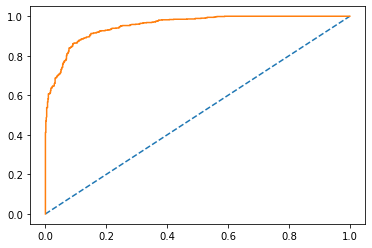

In [59]:
# predict probabilities
probs = ADB_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.952


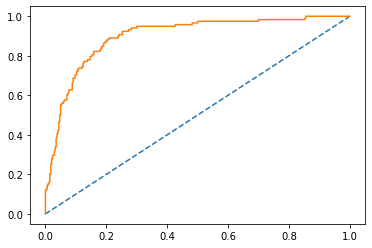

In [60]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Variable importance for Conservative party - Logistic regression

In [82]:
# invoke the LogisticRegression function and find the bestfit model on training data

regression_model = LogisticRegression(solver='newton-cg',max_iter=12000,penalty='none',verbose=True,n_jobs=1,random_state=0)
regression_model.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=12000, n_jobs=1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

In [83]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_res.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 1.0000480936634595
The coefficient for economic.cond.national is -0.48867367251291727
The coefficient for economic.cond.household is 0.003151791594707276
The coefficient for Blair is -0.6005345742182043
The coefficient for Hague is 0.7915514411671052
The coefficient for Europe is 0.20486331715296974
The coefficient for political.knowledge is 0.32799893514922035
The coefficient for gender is -0.5803297989887106


# PROBLEM 2

In [1]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()



[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\RG\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [2]:
#importing Libraries
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS #calling WordCloud and Stopwords
from nltk.corpus import stopwords  #stopwords
from nltk.tokenize import word_tokenize #word tokenizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline
from nltk.stem import PorterStemmer

In [3]:
#Assigning speech to a string variable
rv=inaugural.raw('1941-Roosevelt.txt')
rv

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [4]:
#Number of sentences
senr=len(inaugural.sents('1941-Roosevelt.txt'))
print ("The number of sentences in Roosevelt Speech are : " +  str(senr)) 

The number of sentences in Roosevelt Speech are : 68


In [5]:
#Number of characters without removing spaces 
char1=len(rv)
print ("The number of characters without removing space in Roosevelt Speech are : " +  str(char1))

The number of characters without removing space in Roosevelt Speech are : 7571


In [6]:
# using split() 
# to count words in string 
res = len(rv.split()) 
  
# printing result 
print ("The number of words in Roosevelt Speech are : " +  str(res)) 

The number of words in Roosevelt Speech are : 1360


In [7]:
#Remove spaces
rvc=rv.replace(" ", "")

In [8]:
#Number of characters without spaces
char2=len(rvc)
print ("The number of characters after removing space in Roosevelt Speech are : " +  str(char2))

The number of characters after removing space in Roosevelt Speech are : 6249


In [9]:
#Remove punctuations and special characters- with space_Count number of words and characters
rvw = re.sub("[^a-zA-Z0-9]", " ", rv)

In [10]:
# using split() 
# to count words in string 
res = len(rvw.split()) 
  
# printing result 
print ("The number of words in Roosevelt Speech after removing special characters and punctuations are : " +  str(res)) 

The number of words in Roosevelt Speech after removing special characters and punctuations are : 1350


In [11]:
#Remove punctuations and space-number of characters
rv1=''.join(e for e in rv if e.isalnum())
#Number of charaters without space and punctuations
char3=len(rv1)
print ("The number of characters after removing space and punctuations in Roosevelt Speech are : " +  str(char3))

The number of characters after removing space and punctuations in Roosevelt Speech are : 5962


In [12]:
rvww=rvw.replace(' ','')
#Number of characters without space and punctuations
len(rvww)

5962

In [13]:
#Converting all text to lower case
rvwl=rvw.lower()
rvwl

'on each national day of inauguration since 1789  the people have renewed their sense of dedication to the united states   in washington s day the task of the people was to create and weld together a nation   in lincoln s day the task of the people was to preserve that nation from disruption from within   in this day the task of the people is to save that nation and its institutions from disruption from without   to us there has come a time  in the midst of swift happenings  to pause for a moment and take stock    to recall what our place in history has been  and to rediscover what we are and what we may be  if we do not  we risk the real peril of inaction   lives of nations are determined not by the count of years  but by the lifetime of the human spirit  the life of a man is three score years and ten  a little more  a little less  the life of a nation is the fullness of the measure of its will to live   there are men who doubt this  there are men who believe that democracy  as a form

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
words_tokens = word_tokenize(rvwl)

rv_wo_sw = [word for word in words_tokens if not word in stopwords.words()]

print(rv_wo_sw)

['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'three', 'score', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'doubt', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slavery', 'become', 'surging', 'wave', 'future', 'freedom', 'ebbing', 'tide', 'americans', 'know', '

In [17]:
nltk.FreqDist(rv_wo_sw).most_common(10)

[('nation', 12),
 ('know', 10),
 ('spirit', 9),
 ('life', 9),
 ('democracy', 9),
 ('us', 8),
 ('people', 7),
 ('america', 7),
 ('years', 6),
 ('freedom', 6)]

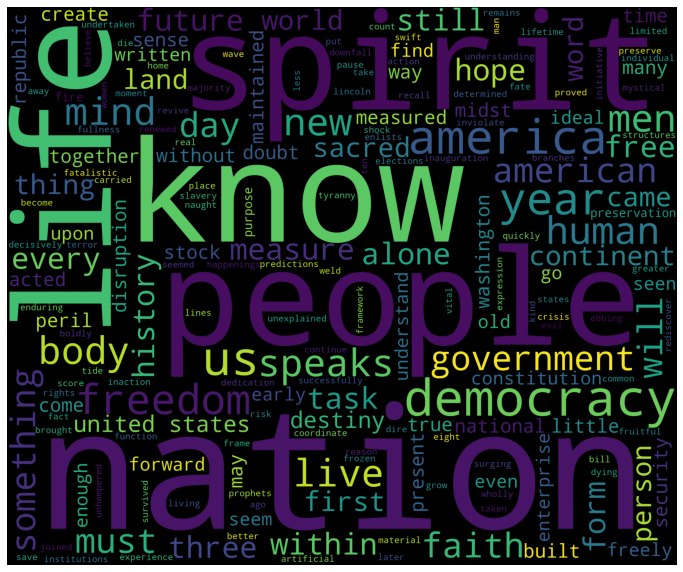

In [18]:
#Word cloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(rvwl)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
words = word_tokenize(rvwl)

for w in words:
    rvs=ps.stem(w)
    print (rvs)

on
each
nation
day
of
inaugur
sinc
1789
the
peopl
have
renew
their
sens
of
dedic
to
the
unit
state
in
washington
s
day
the
task
of
the
peopl
wa
to
creat
and
weld
togeth
a
nation
in
lincoln
s
day
the
task
of
the
peopl
wa
to
preserv
that
nation
from
disrupt
from
within
in
thi
day
the
task
of
the
peopl
is
to
save
that
nation
and
it
institut
from
disrupt
from
without
to
us
there
ha
come
a
time
in
the
midst
of
swift
happen
to
paus
for
a
moment
and
take
stock
to
recal
what
our
place
in
histori
ha
been
and
to
rediscov
what
we
are
and
what
we
may
be
if
we
do
not
we
risk
the
real
peril
of
inact
live
of
nation
are
determin
not
by
the
count
of
year
but
by
the
lifetim
of
the
human
spirit
the
life
of
a
man
is
three
score
year
and
ten
a
littl
more
a
littl
less
the
life
of
a
nation
is
the
full
of
the
measur
of
it
will
to
live
there
are
men
who
doubt
thi
there
are
men
who
believ
that
democraci
as
a
form
of
govern
and
a
frame
of
life
is
limit
or
measur
by
a
kind
of
mystic
and
artifici
fate
that
for
som

In [64]:
#Rarely used words
nltk.FreqDist(rv_wo_sw).most_common()[-50:]

[('president', 1),
 ('inaugural', 1),
 ('almost', 1),
 ('directed', 1),
 ('year', 1),
 ('1941', 1),
 ('liberty', 1),
 ('republican', 1),
 ('model', 1),
 ('justly', 1),
 ('considered', 1),
 ('deeply', 1),
 ('finally', 1),
 ('staked', 1),
 ('experiment', 1),
 ('intrusted', 1),
 ('hands', 1),
 ('lose', 1),
 ('let', 1),
 ('smothered', 1),
 ('fear', 1),
 ('shall', 1),
 ('reject', 1),
 ('strove', 1),
 ('valiantly', 1),
 ('triumphantly', 1),
 ('establish', 1),
 ('furnish', 1),
 ('highest', 1),
 ('justification', 1),
 ('sacrifice', 1),
 ('make', 1),
 ('cause', 1),
 ('defense', 1),
 ('great', 1),
 ('perils', 1),
 ('never', 1),
 ('encountered', 1),
 ('strong', 1),
 ('purpose', 1),
 ('protect', 1),
 ('perpetuate', 1),
 ('integrity', 1),
 ('muster', 1),
 ('retreat', 1),
 ('content', 1),
 ('stand', 1),
 ('service', 1),
 ('country', 1),
 ('god', 1)]

# Kennedy Speech

In [20]:
kn=inaugural.raw('1961-Kennedy.txt')
kn

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [21]:
#Number of sentences
len(inaugural.sents('1961-Kennedy.txt'))

52

In [22]:
#Count (.) for salutations 
kn1=kn.count('Mr.')
kn1

2

In [23]:
#Number of sentences
kns=len(inaugural.sents('1961-Kennedy.txt'))-kn1
print ("The number of sentences in Kennedy Speech are : " +  str(kns)) 

The number of sentences in Kennedy Speech are : 50


In [24]:
#Number of characters without removing spaces 
char=len(kn)
print ("The number of characters without removing space in Kennedy Speech are : " +  str(char))

The number of characters without removing space in Kennedy Speech are : 7618


In [25]:
# using split() 
# to count words in string 
rek = len(kn.split()) 
  
# printing result 
print ("The number of words in Kennedy speech are : " +  str(rek)) 

The number of words in Kennedy speech are : 1390


In [26]:
#Remove spaces
knc=kn.replace(" ", "")

In [27]:
#Number of characters without spaces
char2=len(knc)
print ("The number of characters after removing space in Kennedy Speech are : " +  str(char2))

The number of characters after removing space in Kennedy Speech are : 6255


In [28]:
#Remove punctuations and special characters- with space_Count number of words and characters
knw = re.sub("[^a-zA-Z0-9]", " ", kn)

In [29]:
# using split() 
# to count words in string 
rek1 = len(knw.split()) 
  
# printing result 
print ("The number of words in Kennedy Speech after removing special characters and punctuations are : " +  str(rek1)) 

The number of words in Kennedy Speech after removing special characters and punctuations are : 1370


In [30]:
#Remove punctuations and space-number of characters
kn_1=''.join(e for e in kn if e.isalnum())
#Number of charaters without space and punctuations
char3=len(kn_1)
print ("The number of characters after removing space and punctuations in Kennedy Speech are : " +  str(char3))

The number of characters after removing space and punctuations in Kennedy Speech are : 5998


In [31]:
knww=knw.replace(' ','')
#Number of characters without space and punctuations
len(knww)

5998

In [32]:
#Converting all text to lower case
knwl=knw.lower()
knwl

'vice president johnson  mr  speaker  mr  chief justice  president eisenhower  vice president nixon  president truman  reverend clergy  fellow citizens  we observe today not a victory of party  but a celebration of freedom    symbolizing an end  as well as a beginning    signifying renewal  as well as change  for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago   the world is very different now  for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life  and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe    the belief that the rights of man come not from the generosity of the state  but from the hand of god   we dare not forget today that we are the heirs of that first revolution  let the word go forth from this time and place  to friend and foe alike  that the torch has been passed to a new generatio

In [33]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
words_tokens_kn = word_tokenize(knwl)

kn_wo_sw = [word for word in words_tokens_kn if not word in stopwords.words()]

print(kn_wo_sw)

['vice', 'president', 'johnson', 'mr', 'speaker', 'mr', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman', 'reverend', 'clergy', 'fellow', 'citizens', 'observe', 'today', 'victory', 'party', 'celebration', 'freedom', 'symbolizing', 'well', 'beginning', 'signifying', 'renewal', 'well', 'change', 'sworn', 'almighty', 'god', 'solemn', 'oath', 'forebears', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', 'world', 'different', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', 'belief', 'rights', 'generosity', 'state', 'hand', 'god', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', 'let', 'word', 'go', 'forth', 'time', 'place', 'friend', 'foe', 'alike', 'torch', 'passed', 'new', 'generation', 'americans', 'born', 'century', 'tempered', 'disciplined', 'hard', 'bitter', 'peace

In [36]:
nltk.FreqDist(kn_wo_sw).most_common(10)

[('let', 16),
 ('us', 12),
 ('world', 8),
 ('sides', 8),
 ('new', 7),
 ('pledge', 7),
 ('citizens', 5),
 ('power', 5),
 ('shall', 5),
 ('free', 5)]

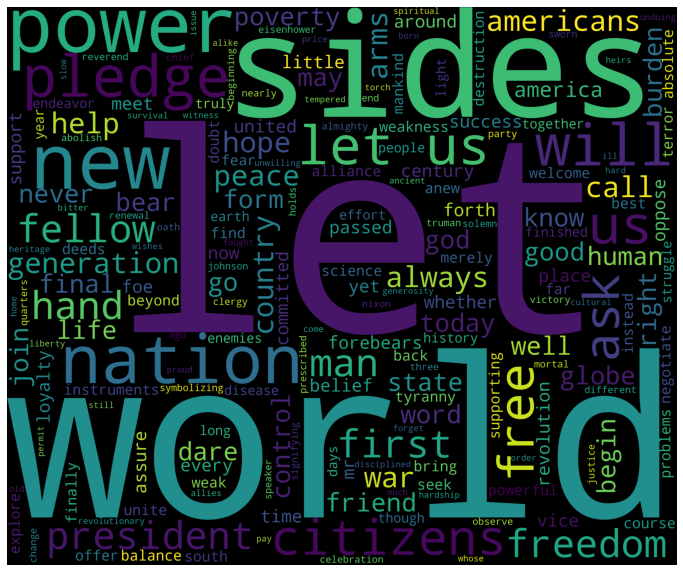

In [37]:
from wordcloud import WordCloud,STOPWORDS
#Word cloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(knwl)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [38]:
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
words = word_tokenize(knwl)

for w in words:
    kns=ps.stem(w)
    print (kns)

vice
presid
johnson
mr
speaker
mr
chief
justic
presid
eisenhow
vice
presid
nixon
presid
truman
reverend
clergi
fellow
citizen
we
observ
today
not
a
victori
of
parti
but
a
celebr
of
freedom
symbol
an
end
as
well
as
a
begin
signifi
renew
as
well
as
chang
for
i
have
sworn
i
befor
you
and
almighti
god
the
same
solemn
oath
our
forebear
l
prescrib
nearli
a
centuri
and
three
quarter
ago
the
world
is
veri
differ
now
for
man
hold
in
hi
mortal
hand
the
power
to
abolish
all
form
of
human
poverti
and
all
form
of
human
life
and
yet
the
same
revolutionari
belief
for
which
our
forebear
fought
are
still
at
issu
around
the
globe
the
belief
that
the
right
of
man
come
not
from
the
generos
of
the
state
but
from
the
hand
of
god
we
dare
not
forget
today
that
we
are
the
heir
of
that
first
revolut
let
the
word
go
forth
from
thi
time
and
place
to
friend
and
foe
alik
that
the
torch
ha
been
pass
to
a
new
gener
of
american
born
in
thi
centuri
temper
by
war
disciplin
by
a
hard
and
bitter
peac
proud
of
our
ancient


In [63]:
#Rarely used words
nltk.FreqDist(kn_wo_sw).most_common()[-50:]

[('embattled', 1),
 ('twilight', 1),
 ('rejoicing', 1),
 ('patient', 1),
 ('tribulation', 1),
 ('common', 1),
 ('forge', 1),
 ('grand', 1),
 ('global', 1),
 ('north', 1),
 ('east', 1),
 ('west', 1),
 ('fruitful', 1),
 ('historic', 1),
 ('effort', 1),
 ('generations', 1),
 ('granted', 1),
 ('role', 1),
 ('defending', 1),
 ('hour', 1),
 ('maximum', 1),
 ('danger', 1),
 ('shrink', 1),
 ('responsibility', 1),
 ('believe', 1),
 ('exchange', 1),
 ('places', 1),
 ('people', 1),
 ('energy', 1),
 ('faith', 1),
 ('devotion', 1),
 ('serve', 1),
 ('glow', 1),
 ('fire', 1),
 ('high', 1),
 ('standards', 1),
 ('strength', 1),
 ('sacrifice', 1),
 ('conscience', 1),
 ('sure', 1),
 ('reward', 1),
 ('judge', 1),
 ('lead', 1),
 ('land', 1),
 ('love', 1),
 ('asking', 1),
 ('blessing', 1),
 ('knowing', 1),
 ('work', 1),
 ('must', 1)]

# Nixon Speech

In [39]:
nx=inaugural.raw('1973-Nixon.txt')
nx

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [40]:
#Number of sentences
len(inaugural.sents('1973-Nixon.txt'))

69

In [41]:
#Count (.) for salutations 
nx1=nx.count('Mr.')
nx1

3

In [42]:
#Count (.) for salutations 
nx2=nx.count('Mrs.')
nx2

1

In [43]:
#Number of sentences
nxs=len(inaugural.sents('1973-Nixon.txt'))-nx1-nx2

print ("The number of sentences in Nixon's Speech are : " +  str(nxs)) 

The number of sentences in Nixon's Speech are : 65


In [44]:
#Number of characters without removing spaces 
char1=len(nx)
print ("The number of characters without removing space in Nixon's Speech are : " +  str(char1))

The number of characters without removing space in Nixon's Speech are : 9991


In [45]:
# using split() 
# to count words in string 
ren = len(nx.split()) 
  
# printing result 
print ("The number of words in Nixon's Speech are : " +  str(ren))

The number of words in Nixon's Speech are : 1819


In [46]:
#Remove spaces
nxc=nx.replace(" ", "")

In [47]:
#Number of characters without spaces
char2=len(nxc)
print ("The number of characters after removing space in Nixon's Speech are : " +  str(char2))

The number of characters after removing space in Nixon's Speech are : 8223


In [48]:
#Remove punctuations and special characters- with space_Count number of words and characters
nxw = re.sub("[^a-zA-Z0-9]", " ", nx)

In [49]:
# using split() 
# to count words in string 
ren1 = len(nxw.split()) 
  
# printing result 
print ("The number of words in Nixon's Speech after removing special characters and punctuations are : " +  str(ren1)) 

The number of words in Nixon's Speech after removing special characters and punctuations are : 1819


In [50]:
#Remove punctuations and space-number of characters
kn_1=''.join(e for e in kn if e.isalnum())
#Number of charaters without space and punctuations
char3=len(kn_1)
print ("The number of characters after removing space and punctuations in Nixon's Speech are : " +  str(char3))

The number of characters after removing space and punctuations in Nixon's Speech are : 5998


In [51]:
nxww=nxw.replace(' ','')
#Number of characters without space and punctuations
len(nxww)

7895

In [52]:
#Converting all text to lower case
nxwl=nxw.lower()
nxwl

'mr  vice president  mr  speaker  mr  chief justice  senator cook  mrs  eisenhower  and my fellow citizens of this great and good country we share together   when we met here four years ago  america was bleak in spirit  depressed by the prospect of seemingly endless war abroad and of destructive conflict at home   as we meet here today  we stand on the threshold of a new era of peace in the world   the central question before us is  how shall we use that peace  let us resolve that this era we are about to enter will not be what other postwar periods have so often been  a time of retreat and isolation that leads to stagnation at home and invites new danger abroad   let us resolve that this will be what it can become  a time of great responsibilities greatly borne  in which we renew the spirit and the promise of america as we enter our third century as a nation   this past year saw far reaching results from our new policies for peace  by continuing to revitalize our traditional friendshi

In [53]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
words_tokens_nx = word_tokenize(nxwl)

nx_wo_sw = [word for word in words_tokens_nx if not word in stopwords.words()]

print(nx_wo_sw)

['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', 'four', 'years', 'ago', 'america', 'bleak', 'spirit', 'depressed', 'prospect', 'seemingly', 'endless', 'abroad', 'destructive', 'conflict', 'home', 'meet', 'today', 'stand', 'threshold', 'new', 'peace', 'world', 'central', 'question', 'us', 'shall', 'use', 'peace', 'let', 'us', 'resolve', 'enter', 'postwar', 'periods', 'often', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', 'let', 'us', 'resolve', 'become', 'time', 'great', 'responsibilities', 'greatly', 'borne', 'renew', 'spirit', 'promise', 'america', 'enter', 'third', 'century', 'nation', 'past', 'year', 'saw', 'far', 'reaching', 'results', 'new', 'policies', 'peace', 'continuing', 'revitalize', 'traditional', 'friendships', 'missions', 'peking', 'moscow', 'able', 'establish', 'base', 'new', 'durable'

In [56]:
nltk.FreqDist(nx_wo_sw).most_common(10)

[('us', 26),
 ('let', 22),
 ('america', 21),
 ('peace', 19),
 ('world', 18),
 ('new', 15),
 ('nation', 11),
 ('responsibility', 11),
 ('government', 10),
 ('great', 9)]

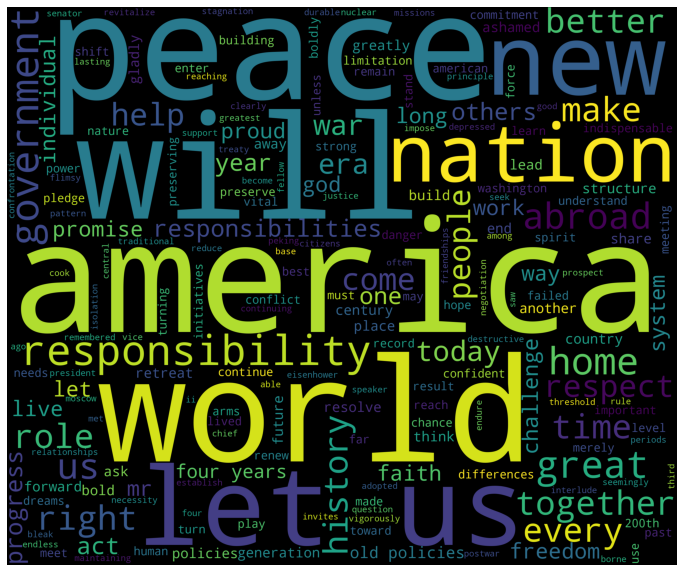

In [57]:
#Word cloud
wordcloud = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(nxwl)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [58]:
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
words = word_tokenize(nxwl)

for w in words:
    nxs=ps.stem(w)
    print (nxs)

mr
vice
presid
mr
speaker
mr
chief
justic
senat
cook
mr
eisenhow
and
my
fellow
citizen
of
thi
great
and
good
countri
we
share
togeth
when
we
met
here
four
year
ago
america
wa
bleak
in
spirit
depress
by
the
prospect
of
seemingli
endless
war
abroad
and
of
destruct
conflict
at
home
as
we
meet
here
today
we
stand
on
the
threshold
of
a
new
era
of
peac
in
the
world
the
central
question
befor
us
is
how
shall
we
use
that
peac
let
us
resolv
that
thi
era
we
are
about
to
enter
will
not
be
what
other
postwar
period
have
so
often
been
a
time
of
retreat
and
isol
that
lead
to
stagnat
at
home
and
invit
new
danger
abroad
let
us
resolv
that
thi
will
be
what
it
can
becom
a
time
of
great
respons
greatli
born
in
which
we
renew
the
spirit
and
the
promis
of
america
as
we
enter
our
third
centuri
as
a
nation
thi
past
year
saw
far
reach
result
from
our
new
polici
for
peac
by
continu
to
revit
our
tradit
friendship
and
by
our
mission
to
peke
and
to
moscow
we
were
abl
to
establish
the
base
for
a
new
and
more
durab

In [62]:
#Rarely used words
nltk.FreqDist(nx_wo_sw).most_common()[-50:]

[('abundance', 1),
 ('widely', 1),
 ('shared', 1),
 ('engaged', 1),
 ('including', 1),
 ('bringing', 1),
 ('fought', 1),
 ('selfish', 1),
 ('advantage', 1),
 ('resist', 1),
 ('aggression', 1),
 ('steadfastness', 1),
 ('honor', 1),
 ('break', 1),
 ('creating', 1),
 ('known', 1),
 ('last', 1),
 ('embarking', 1),
 ('presents', 1),
 ('generation', 1),
 ('faced', 1),
 ('answer', 1),
 ('conscience', 1),
 ('hallowed', 1),
 ('stood', 1),
 ('recognized', 1),
 ('needed', 1),
 ('beyond', 1),
 ('order', 1),
 ('true', 1),
 ('prayers', 1),
 ('ahead', 1),
 ('making', 1),
 ('decisions', 1),
 ('pray', 1),
 ('worthy', 1),
 ('challenge', 1),
 ('next', 1),
 ('birthday', 1),
 ('young', 1),
 ('began', 1),
 ('bright', 1),
 ('beacon', 1),
 ('go', 1),
 ('sustained', 1),
 ('created', 1),
 ('striving', 1),
 ('always', 1),
 ('serve', 1),
 ('purpose', 1)]